Łączna liczba zdjęć w zbiorze treningowym: 4410
Łączna liczba zdjęć w zbiorze testowym: 185
Łączna liczba zdjęć w zbiorze walidacyjnym: 185


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

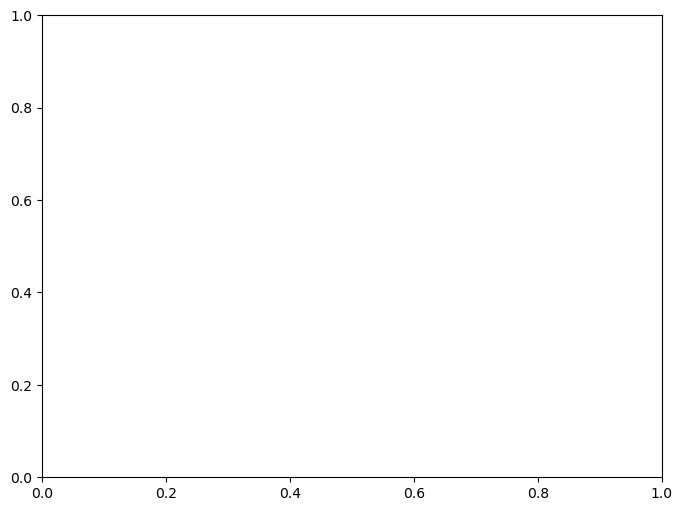

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import glob
#
#Sprawdzam czy ramka danych nie uległa zmianie
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Rotated', 'Train')
test_path = os.path.join(data_path, 'Rotated', 'test')
valid_path = os.path.join(data_path, 'Rotated', 'valid')

# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

def total_images_in_dataset(files_dict):
    return sum(len(paths) for paths in files_dict.values())

train_total = total_images_in_dataset(train_files)
test_total = total_images_in_dataset(test_files)
valid_total = total_images_in_dataset(valid_files)
total_all = train_total + test_total + valid_total

print("Łączna liczba zdjęć w zbiorze treningowym:", train_total)
print("Łączna liczba zdjęć w zbiorze testowym:", test_total)
print("Łączna liczba zdjęć w zbiorze walidacyjnym:", valid_total)

total_all = train_total + test_total + valid_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Zbiór': ['Train', 'Test', 'Validation'],
    'Liczba obrazów': [train_total, test_total, valid_total],
})

df['% całości'] = df['Liczba obrazów'] / total_all * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Zbiór', y='Liczba obrazów', hue='Zbiór', palette='pastel', legend=False)

for i, row in df.iterrows():
    plt.text(i, row['Liczba obrazów'] + total_all * 0.01, 
             f"{row['Liczba obrazów']} ({row['% całości']:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Łączna liczba obrazów i ich procentowy udział w zbiorach danych')
plt.tight_layout()
plt.show()


In [8]:
import os
import glob
import random
import shutil

source_root = 'DATA\\Rotated'
target_root = 'DATA\\Rotated_Klasteryzacja'

classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish',
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

splits = ['Train', 'valid', 'test']

# Tworzenie folderów docelowych
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(target_root, split, cls), exist_ok=True)

# Przetwarzanie klas
for cls in classes:
    # Pobierz wszystkie obrazy z Train, valid i test
    all_files = []
    for split in splits:
        all_files += glob.glob(os.path.join(source_root, split, cls, '*.jpg'))

    random.shuffle(all_files)

    # Oblicz nowy podział 80/10/10
    total = len(all_files)
    n_train = int(0.8 * total)
    n_valid = int(0.1 * total)
    n_test = total - n_train - n_valid

    train_files = all_files[:n_train]
    valid_files = all_files[n_train:n_train + n_valid]
    test_files = all_files[n_train + n_valid:]

    # Kopiowanie plików do nowego katalogu
    def copy_files(file_list, split_name):
        for file in file_list:
            filename = os.path.basename(file)
            dest = os.path.join(target_root, split_name, cls, filename)
            shutil.copy2(file, dest)

    copy_files(train_files, 'Train')
    copy_files(valid_files, 'valid')
    copy_files(test_files, 'test')

print("✅ Nowy podział zapisany w 'Rotated_Klasteryzacja' (80%/10%/10%). Oryginalne dane pozostają nietknięte.")




✅ Nowy podział zapisany w 'Rotated_Klasteryzacja' (80%/10%/10%). Oryginalne dane pozostają nietknięte.


Łączna liczba zdjęć w zbiorze treningowym: 3824
Łączna liczba zdjęć w zbiorze testowym: 479
Łączna liczba zdjęć w zbiorze walidacyjnym: 477


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

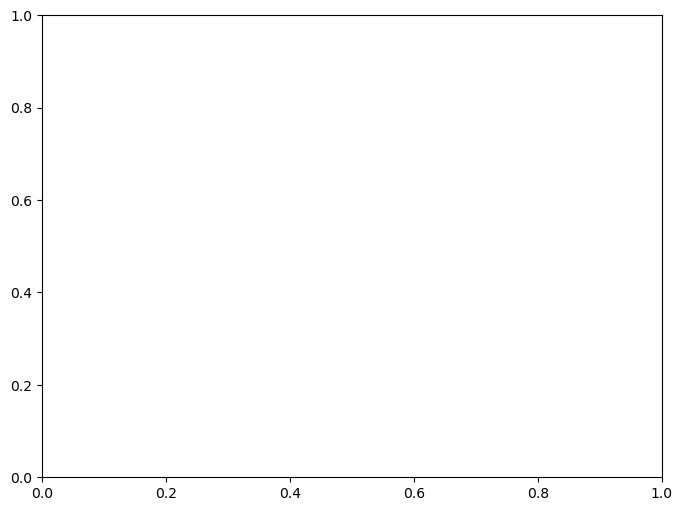

In [9]:

#Sprawdzam czy ramka danych nie uległa zmianie
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Rotated_Klasteryzacja', 'Train')
test_path = os.path.join(data_path, 'Rotated_Klasteryzacja', 'test')
valid_path = os.path.join(data_path, 'Rotated_Klasteryzacja', 'valid')


# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

def total_images_in_dataset(files_dict):
    return sum(len(paths) for paths in files_dict.values())

train_total = total_images_in_dataset(train_files)
test_total = total_images_in_dataset(test_files)
valid_total = total_images_in_dataset(valid_files)
total_all = train_total + test_total + valid_total

print("Łączna liczba zdjęć w zbiorze treningowym:", train_total)
print("Łączna liczba zdjęć w zbiorze testowym:", test_total)
print("Łączna liczba zdjęć w zbiorze walidacyjnym:", valid_total)

total_all = train_total + test_total + valid_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Zbiór': ['Train', 'Test', 'Validation'],
    'Liczba obrazów': [train_total, test_total, valid_total],
})

df['% całości'] = df['Liczba obrazów'] / total_all * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Zbiór', y='Liczba obrazów', hue='Zbiór', palette='pastel', legend=False)

for i, row in df.iterrows():
    plt.text(i, row['Liczba obrazów'] + total_all * 0.01, 
             f"{row['Liczba obrazów']} ({row['% całości']:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Łączna liczba obrazów i ich procentowy udział w zbiorach danych')
plt.tight_layout()
plt.show()

In [4]:
# Funkcja do wczytania i przetworzenia danych z CSV
def load_and_preprocess_csv(file_path):
    try:
        # Wczytanie pliku CSV
        data = pd.read_csv(file_path)
        # Wybór tylko kolumn numerycznych
        X = data.select_dtypes(include=[np.number])
        if X.empty:
            raise ValueError("Plik CSV nie zawiera kolumn numerycznych!")
        if X.shape[1] < 2:
            raise ValueError("Dane muszą mieć co najmniej 2 wymiary do wizualizacji 2D!")
        print(f"Wczytano dane z {file_path}: {X.shape[0]} wierszy, {X.shape[1]} cech.")
        return X
    except Exception as e:
        print(f"Błąd podczas wczytywania danych: {e}")
        exit()

Silhouette Score:
Silhouette Score to metryka oceniająca jakość klastrowania, mierząc, jak dobrze punkty są przypisane do swoich klastrów w porównaniu do innych klastrów. Wartość Silhouette Score waha się od -1 do 1:

+1: Punkt jest dobrze przypisany do swojego klastra i daleko od innych.
0: Punkt jest blisko granicy między klastrami.
-1: Punkt może być źle przypisany (bliżej innego klastra).

Średni Silhouette Score dla wszystkich punktów daje ocenę dla danej liczby klastrów.
Testujemy różne k i wybieramy to, które daje najwyższy średni Silhouette Score.

Metoda łokciowa:
Dla różnych wartości k (liczby klastrów, np. od 2 do 10) trenujemy model K-means.
Obliczamy WCSS dla każdej wartości k.
Rysujemy wykres, gdzie na osi X mamy liczbę klastrów (k), a na osi Y – WCSS.
Szukamy punktu, w którym WCSS przestaje znacząco maleć – tzw. „łokieć” (punkt, gdzie dodanie kolejnych klastrów daje niewielką poprawę). Ten punkt wskazuje optymalną liczbę klastrów.

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: 0.3598, WCSS: 2190482.48
Silhouette Score dla 3 klastrów: 0.2191, WCSS: 1831299.63
Silhouette Score dla 4 klastrów: 0.1564, WCSS: 1687003.74
Silhouette Score dla 5 klastrów: 0.1419, WCSS: 1635859.84
Silhouette Score dla 6 klastrów: 0.1222, WCSS: 1570914.35
Silhouette Score dla 7 klastrów: 0.0984, WCSS: 1528299.58
Silhouette Score dla 8 klastrów: 0.1152, WCSS: 1502892.21
Silhouette Score dla 9 klastrów: 0.0968, WCSS: 1463724.34
Silhouette Score dla 10 klastrów: 0.0914, WCSS: 1441867.04


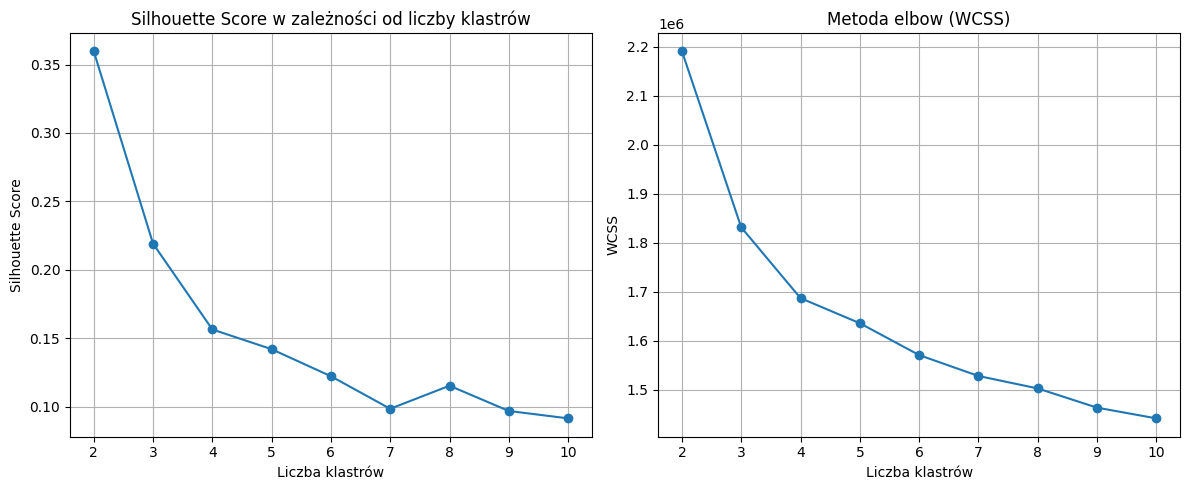

Optymalna liczba klastrów (na podstawie Silhouette Score): 2


C:\Users\oliwi\AppData\Local\Temp\ipykernel_50108\4035425858.py:70: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 3 Axes> than <Figure size 1000x600 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Klaster')


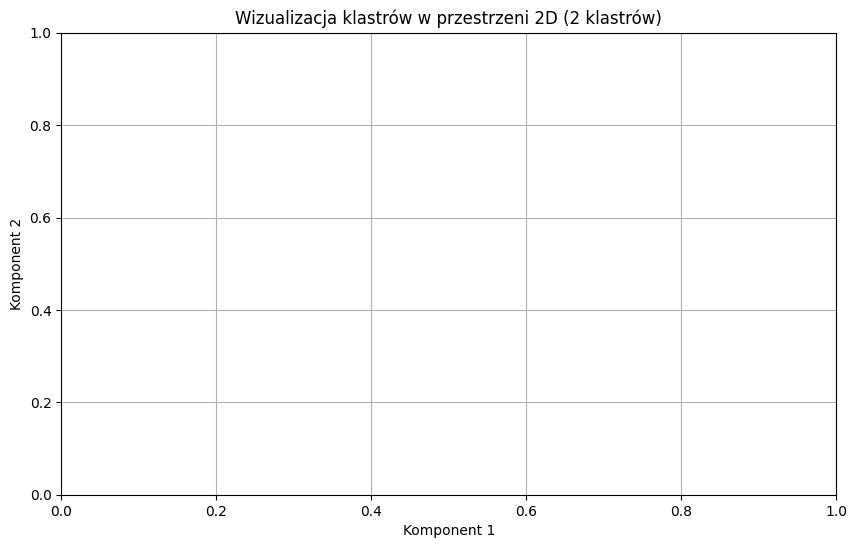

In [ ]:
#K-Means i dostarajanie hiperparametrów - metoda Elbow i Silhouette0
#PCA100
import pandas as pd8
import numpy as np0
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania liczby klastrów (Silhouette Score i Elbow)
def evaluate_kmeans(X, max_clusters=10):
    silhouette_scores = []
    wcss = []  # Within-Cluster Sum of Squares
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        # Silhouette Score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        # WCSS (metoda elbow)
        wcss.append(kmeans.inertia_)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}, WCSS: {wcss[-1]:.2f}")
    
    # Wizualizacja 1: Silhouette Score
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score w zależności od liczby klastrów')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    
    # Wizualizacja 2: Metoda elbow (WCSS)
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, wcss, marker='o')
    plt.title('Metoda elbow (WCSS)')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('WCSS')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Zwracamy optymalną liczbę klastrów na podstawie Silhouette Score
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters

# Dostrajanie liczby klastrów na danych
optimal_n_clusters = evaluate_kmeans(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Means z optymalną liczbą klastrów
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Dane zostały znormalizowane.
Silhouette Score dla 2 klastrów: 0.1167, WCSS: 36892.26
Silhouette Score dla 3 klastrów: 0.1138, WCSS: 34331.16
Silhouette Score dla 4 klastrów: 0.1150, WCSS: 32373.73
Silhouette Score dla 5 klastrów: 0.1343, WCSS: 30124.81
Silhouette Score dla 6 klastrów: 0.1403, WCSS: 28292.89
Silhouette Score dla 7 klastrów: 0.1355, WCSS: 27240.76
Silhouette Score dla 8 klastrów: 0.1491, WCSS: 25699.20
Silhouette Score dla 9 klastrów: 0.1509, WCSS: 24691.44
Silhouette Score dla 10 klastrów: 0.1475, WCSS: 23856.50


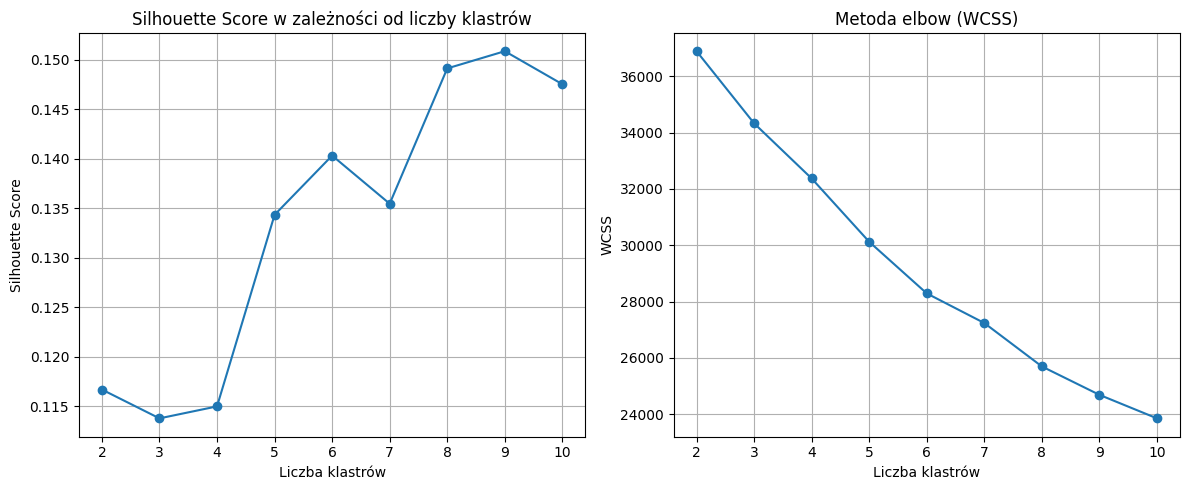

Optymalna liczba klastrów (na podstawie Silhouette Score): 9


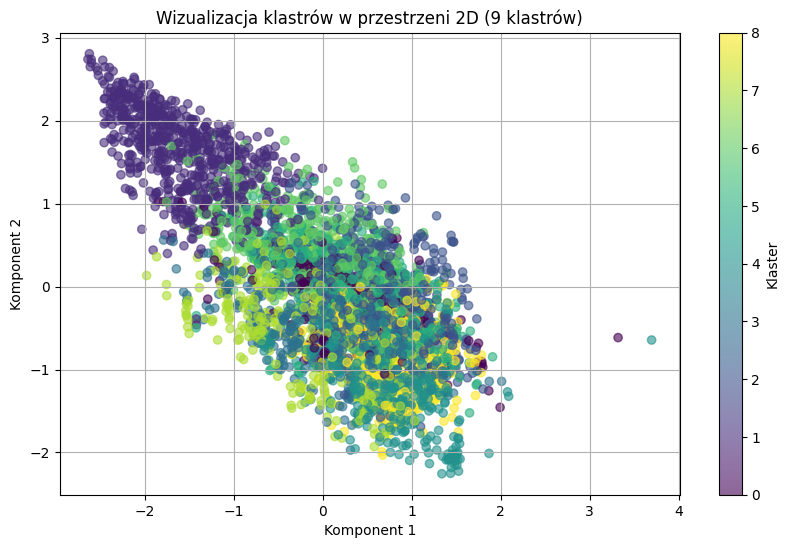

In [ ]:
#K-Means i dostarajanie hiperparametrów - metoda Elbow i Silhouette0
#PCA10

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Dostrajanie liczby klastrów na danych
optimal_n_clusters = evaluate_kmeans(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Means z optymalną liczbą klastrów
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


In [ ]:
#pip install scikit-learn-extra
import sklearn_extra0

PAM Cost (Partitioning Around Medoids Cost) to metryka używana w algorytmie K-Medoids do oceny jakości klastrowania. Jest odpowiednikiem WCSS (Within-Cluster Sum of Squares) w K-Means, ale dostosowanym do specyfiki K-Medoids, który zamiast średnich (centroidów) używa rzeczywistych punktów danych jako reprezentantów klastrów, zwanych medoidami.

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: 0.0056, PAM Cost: 41032.96
Silhouette Score dla 3 klastrów: 0.0019, PAM Cost: 40703.35
Silhouette Score dla 4 klastrów: -0.0024, PAM Cost: 40457.75
Silhouette Score dla 5 klastrów: 0.0014, PAM Cost: 40268.02
Silhouette Score dla 6 klastrów: 0.0016, PAM Cost: 40099.70
Silhouette Score dla 7 klastrów: -0.0089, PAM Cost: 39971.66
Silhouette Score dla 8 klastrów: -0.0192, PAM Cost: 39847.95
Silhouette Score dla 9 klastrów: -0.0177, PAM Cost: 39732.84
Silhouette Score dla 10 klastrów: -0.0163, PAM Cost: 39620.68


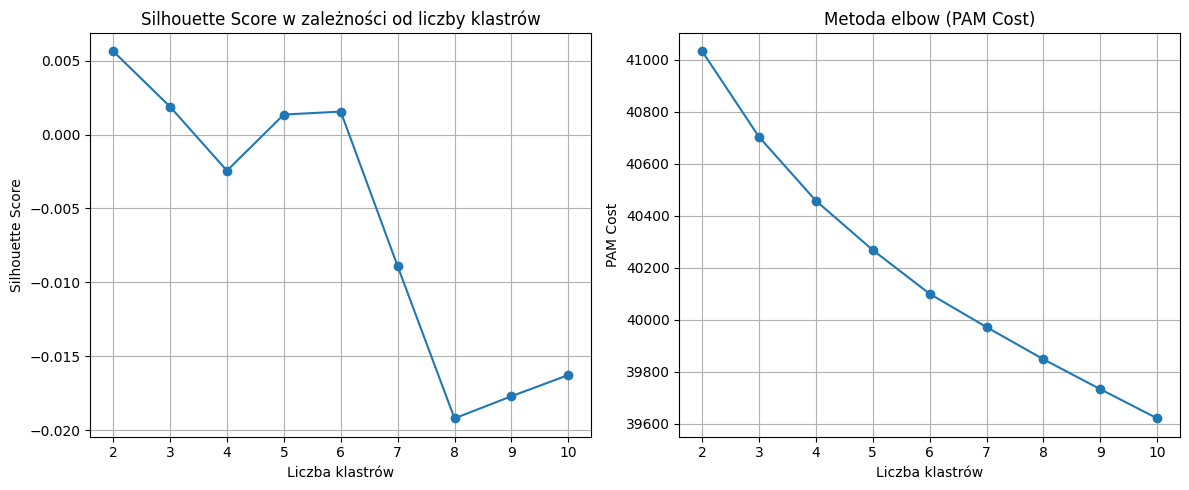

Optymalna liczba klastrów (na podstawie Silhouette Score): 2


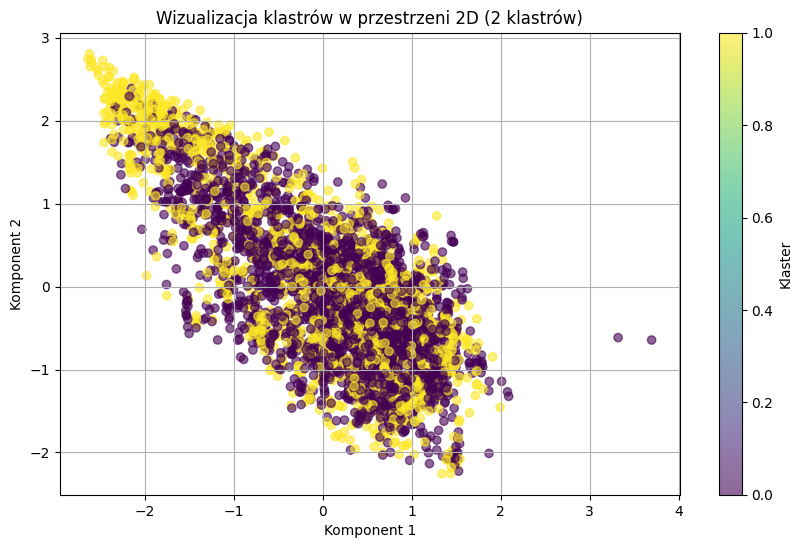

In [7]:
#K-Medoids i dostrajanie hiperparametrów - metoda Elbow i PAM Cost (elbow)
#PCA100
import numpy as np
import cv2
import os
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania liczby klastrów (Silhouette Score i PAM Cost)
def evaluate_kmedoids(X, max_clusters=10):
    silhouette_scores = []
    pam_costs = []  # Sum of distances to medoids (odpowiednik WCSS)
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, method='pam')
        cluster_labels = kmedoids.fit_predict(X)
        # Silhouette Score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        # PAM Cost
        pam_costs.append(kmedoids.inertia_)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}, PAM Cost: {pam_costs[-1]:.2f}")
    
    # Wizualizacja 1: Silhouette Score
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score w zależności od liczby klastrów')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    
    # Wizualizacja 2: Metoda elbow (PAM Cost)
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, pam_costs, marker='o')
    plt.title('Metoda elbow (PAM Cost)')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('PAM Cost')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Zwracamy optymalną liczbę klastrów na podstawie Silhouette Score
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_kmedoids(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Medoids z optymalną liczbą klastrów
kmedoids = KMedoids(n_clusters=optimal_n_clusters, random_state=42, method='pam')
labels = kmedoids.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.0728, PAM Cost: 12323.77
Silhouette Score dla 3 klastrów: 0.0892, PAM Cost: 11572.26
Silhouette Score dla 4 klastrów: 0.0954, PAM Cost: 11106.34
Silhouette Score dla 5 klastrów: 0.1173, PAM Cost: 10713.10
Silhouette Score dla 6 klastrów: 0.1179, PAM Cost: 10440.93
Silhouette Score dla 7 klastrów: 0.1259, PAM Cost: 10204.44
Silhouette Score dla 8 klastrów: 0.1317, PAM Cost: 10022.76
Silhouette Score dla 9 klastrów: 0.1329, PAM Cost: 9873.59
Silhouette Score dla 10 klastrów: 0.1346, PAM Cost: 9718.65


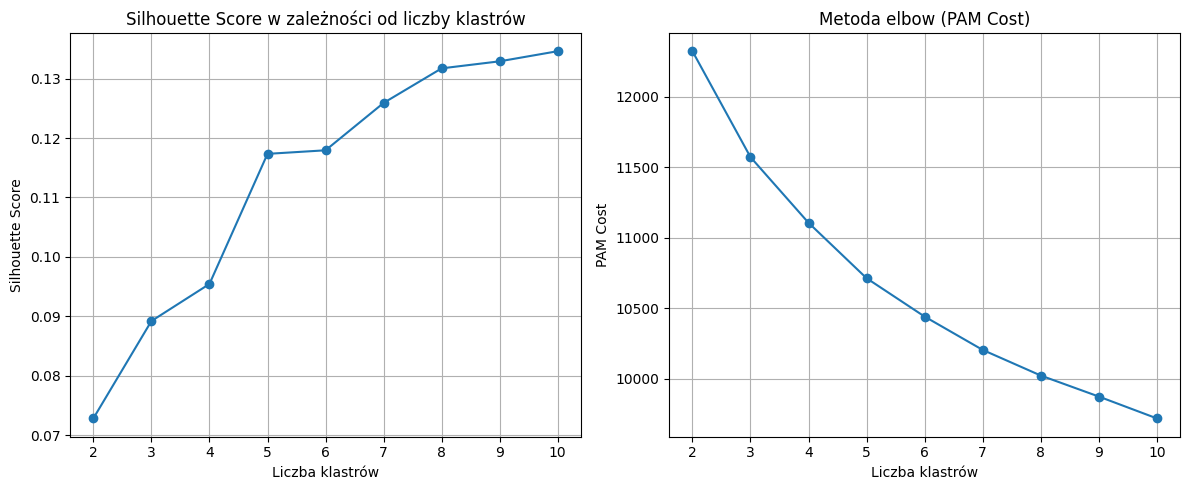

Optymalna liczba klastrów (na podstawie Silhouette Score): 10


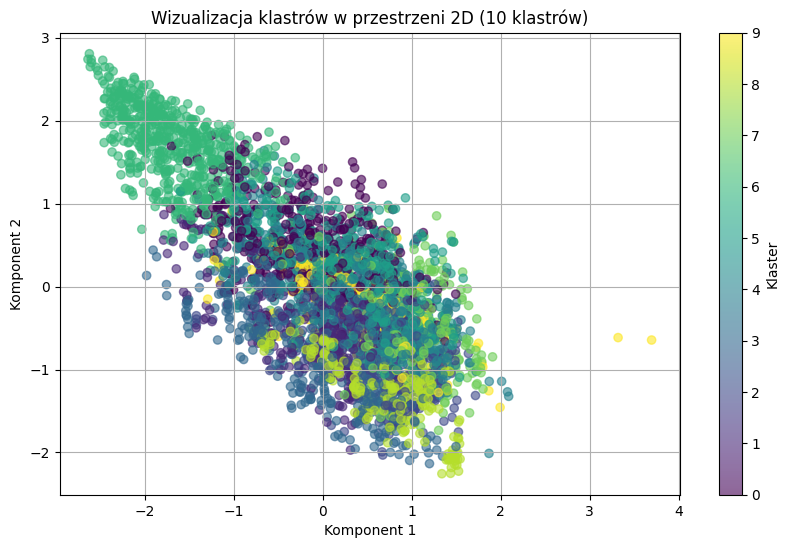

In [ ]:
#K-Medoids i dostrajanie hiperparametrów - metoda Elbow i PAM Cost (elbow)
#PCA10

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_kmedoids(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Medoids z optymalną liczbą klastrów
kmedoids = KMedoids(n_clusters=optimal_n_clusters, random_state=42, method='pam')
labels = kmedoids.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
eps=2.00, min_samples=3, Silhouette Score=0.0575, Liczba klastrów=1
eps=2.50, min_samples=3, Silhouette Score=0.0575, Liczba klastrów=1
eps=3.00, min_samples=3, Silhouette Score=-0.2255, Liczba klastrów=15
eps=3.00, min_samples=4, Silhouette Score=-0.2176, Liczba klastrów=5
eps=3.00, min_samples=5, Silhouette Score=-0.2148, Liczba klastrów=2
eps=3.50, min_samples=3, Silhouette Score=-0.2161, Liczba klastrów=39
eps=3.50, min_samples=4, Silhouette Score=-0.2187, Liczba klastrów=14
eps=3.50, min_samples=5, Silhouette Score=-0.2039, Liczba klastrów=4
eps=3.50, min_samples=6, Silhouette Score=-0.1952, Liczba klastrów=3
eps=3.50, min_samples=7, Silhouette Score=-0.2125, Liczba klastrów=2
eps=3.50, min_samples=8, Silhouette Score=-0.2019, Liczba klastrów=1
eps=4.00, min_samples=3, Silhouette Score=-0.1978, Liczba klastrów=77
eps=4.00, min_samples=4, Silhouette Score=-0.1954, Liczba 

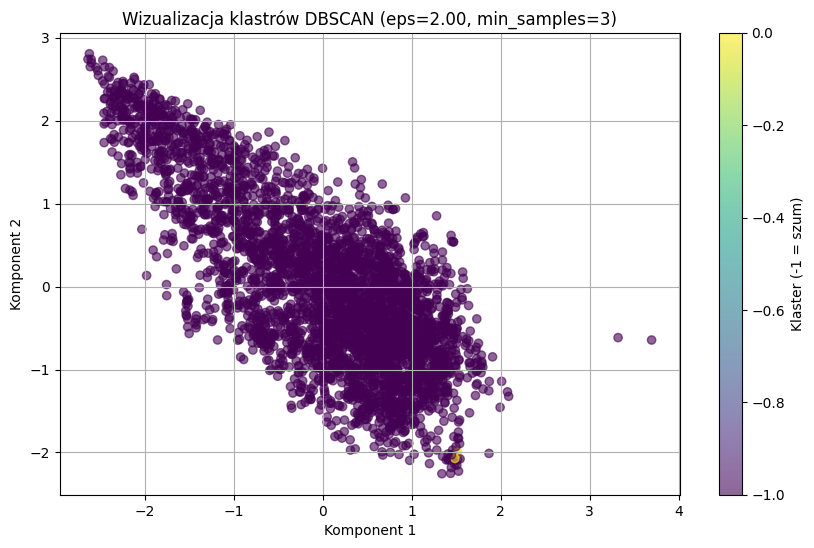

In [ ]:
#DBSCAN, hiperparametry: eps (maksymalna odległość między punktami w klastrze) i min_samples (minimalna liczba punktów w klastrze).
#PCA100
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania DBSCAN
def evaluate_dbscan(X, eps_range=np.arange(0.5, 5.0, 0.5), min_samples_range=range(3, 10)):
    best_eps = None
    best_min_samples = None
    best_silhouette = -1
    best_labels = None
    silhouette_scores = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            # Sprawdzamy, czy jest więcej niż jeden klaster i mniej klastrów niż punktów
            if len(set(labels)) > 1 and len(set(labels)) < len(X):
                silhouette = silhouette_score(X, labels)
                silhouette_scores.append((eps, min_samples, silhouette))
                print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette Score={silhouette:.4f}, Liczba klastrów={len(set(labels)) - (1 if -1 in labels else 0)}")
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels
    
    if best_labels is None:
        print("Nie znaleziono odpowiednich parametrów dla DBSCAN!")
        exit()
    
    print(f"Najlepsze parametry: eps={best_eps:.2f}, min_samples={best_min_samples}, Silhouette Score={best_silhouette:.4f}")
    return best_labels, best_eps, best_min_samples

# Dostrajanie DBSCAN
best_labels, best_eps, best_min_samples = evaluate_dbscan(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów DBSCAN (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
eps=0.50, min_samples=3, Silhouette Score=-0.3976, Liczba klastrów=45
eps=0.50, min_samples=4, Silhouette Score=-0.2527, Liczba klastrów=11
eps=0.50, min_samples=5, Silhouette Score=-0.0271, Liczba klastrów=4
eps=0.50, min_samples=6, Silhouette Score=0.0208, Liczba klastrów=2
eps=0.50, min_samples=7, Silhouette Score=0.0469, Liczba klastrów=1
eps=0.50, min_samples=8, Silhouette Score=0.0469, Liczba klastrów=1
eps=0.50, min_samples=9, Silhouette Score=0.0431, Liczba klastrów=1
eps=1.00, min_samples=3, Silhouette Score=-0.0596, Liczba klastrów=331
eps=1.00, min_samples=4, Silhouette Score=-0.1597, Liczba klastrów=194
eps=1.00, min_samples=5, Silhouette Score=-0.2214, Liczba klastrów=122
eps=1.00, min_samples=6, Silhouette Score=-0.2643, Liczba klastrów=74
eps=1.00, min_samples=7, Silhouette Score=-0.2734, Liczba klastrów=47
eps=1.00, min_samples=8, Silhouette Score=-0.2751, Liczb

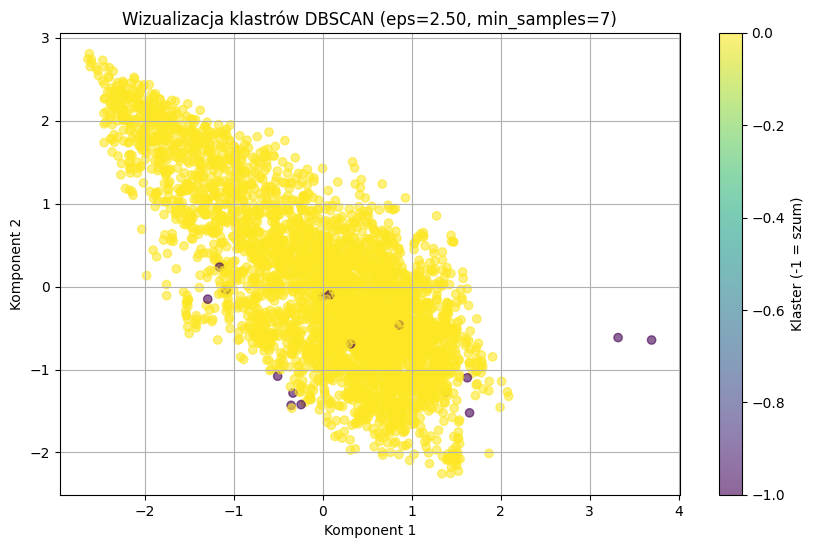

In [12]:
#DBSCAN, hiperparametry: eps (maksymalna odległość między punktami w klastrze) i min_samples (minimalna liczba punktów w klastrze).
#PCA10
# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie DBSCAN
best_labels, best_eps, best_min_samples = evaluate_dbscan(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów DBSCAN (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Hierarchia: Pozwala zobaczyć, jak punkty grupują się na różnych poziomach, co jest przydatne, gdy klastry są niejasne.
Działa z PCA: Dane po PCA są już zredukowane, co zmniejsza szum i ułatwia algorytmowi znajdowanie struktur.

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: -0.0811
Silhouette Score dla 3 klastrów: -0.0788
Silhouette Score dla 4 klastrów: -0.0742
Silhouette Score dla 5 klastrów: -0.0716
Silhouette Score dla 6 klastrów: -0.0684
Silhouette Score dla 7 klastrów: -0.0669
Silhouette Score dla 8 klastrów: -0.0641
Silhouette Score dla 9 klastrów: -0.0616
Silhouette Score dla 10 klastrów: -0.0590


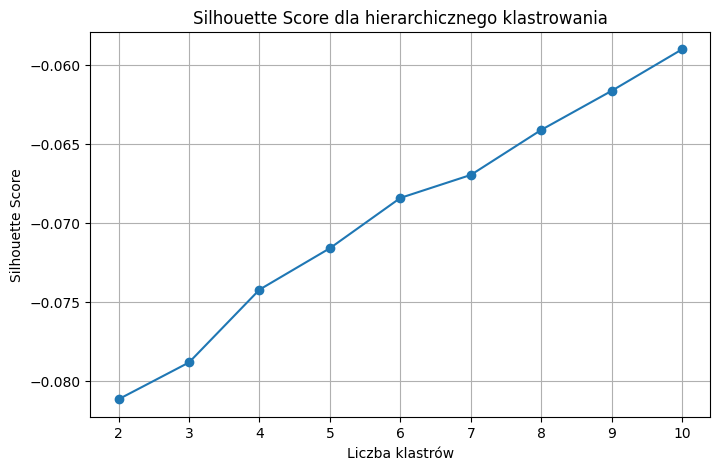

Optymalna liczba klastrów (na podstawie Silhouette Score): 10


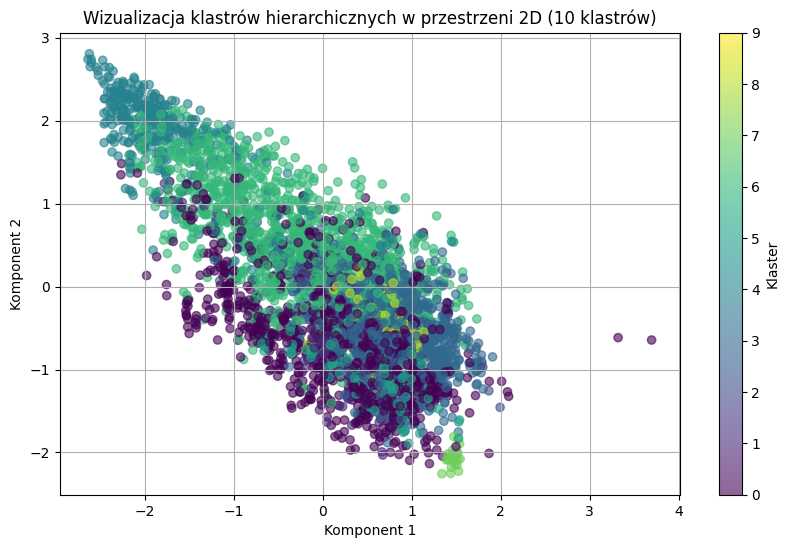

In [13]:
#Hierarchiczne klastrowanie, Shilhouette Score 
#PCA100
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania liczby klastrów
def evaluate_hierarchical(X, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = hierarchical.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}")
    
    # Wizualizacja Silhouette Score
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score dla hierarchicznego klastrowania')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
    
    # Zwracamy optymalną liczbę klastrów
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_hierarchical(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu hierarchicznego z optymalną liczbą klastrów
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
labels = hierarchical.fit_predict(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów hierarchicznych w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.0931
Silhouette Score dla 3 klastrów: 0.1049
Silhouette Score dla 4 klastrów: 0.1096
Silhouette Score dla 5 klastrów: 0.1066
Silhouette Score dla 6 klastrów: 0.1126
Silhouette Score dla 7 klastrów: 0.0902
Silhouette Score dla 8 klastrów: 0.0955
Silhouette Score dla 9 klastrów: 0.1002
Silhouette Score dla 10 klastrów: 0.1066


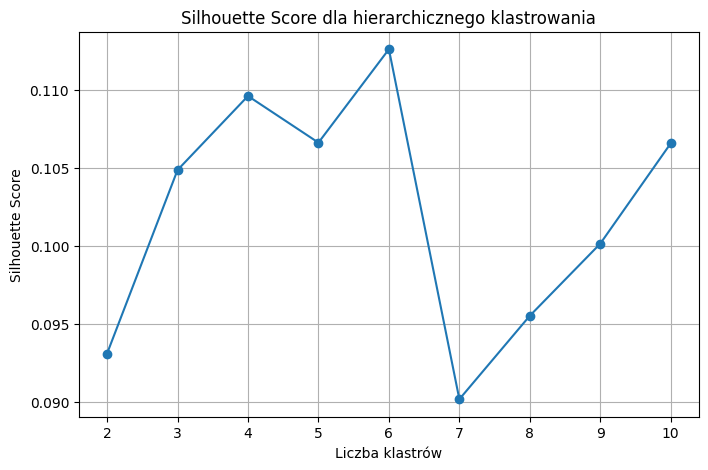

Optymalna liczba klastrów (na podstawie Silhouette Score): 6


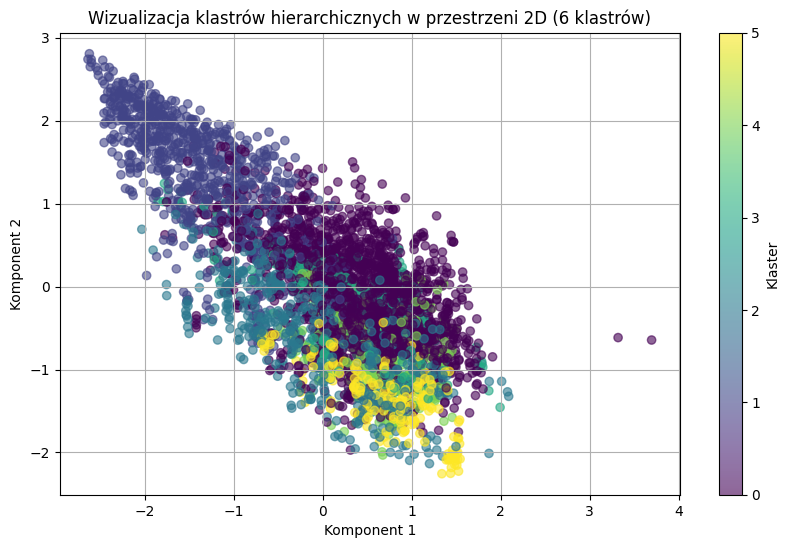

In [ ]:
#Hierarchiczne klastrowanie, Shilhouette Score 
#PCA10

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_hierarchical(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu hierarchicznego z optymalną liczbą klastrów
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
labels = hierarchical.fit_predict(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów hierarchicznych w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

#CHYBA NAJLEPSZE JAK DO TEJ PORY (6 klastwo poodzielanych - 6 gatunkow meduz)

In [ ]:
#pip install hdbscan

HDBSCAN jest rozszerzeniem DBSCAN, które nie wymaga określania liczby klastrów i dobrze radzi sobie z danymi o różnej gęstości.
Może oznaczyć punkty w mniej gęstych regionach jako szum (-1), co jest przydatne, jeśli większość danych tworzy jedno skupisko, ale istnieją subtelne gęstsze podgrupy.
Elastyczne podejście hierarchiczne pozwala wykryć klastry o nieregularnych kształtach.

min_cluster_size: Określa minimalny rozmiar klastra (np. 5–20, w zależności od liczby punktów).
min_samples: Kontroluje konserwatyzm w oznaczaniu szumu (np. 5–10).

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Liczba klastrów: 157
Silhouette Score: 0.0215


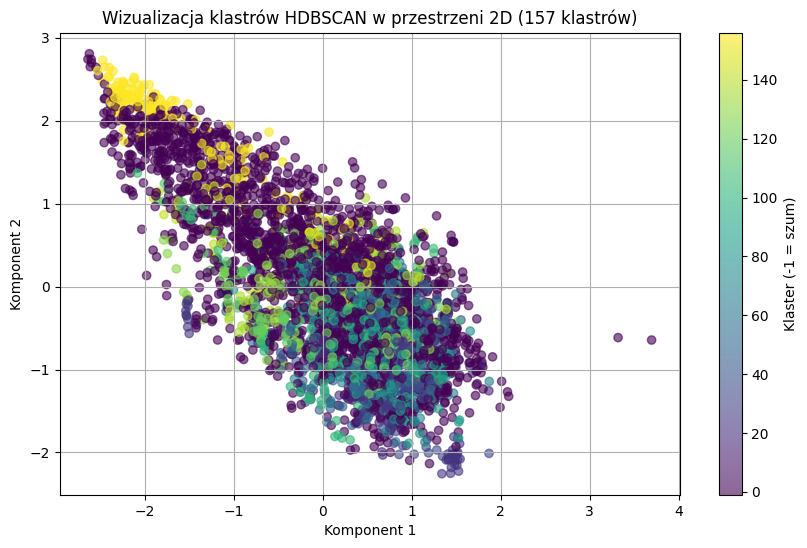

In [15]:
#HDBSCAN
#PCA100
import pandas as pd
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych (pomiń, jeśli dane są już znormalizowane)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klastrowanie za pomocą HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Odejmujemy szum (-1)
print(f"Liczba klastrów: {n_clusters}")
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Za mało klastrów do obliczenia Silhouette Score.")

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów HDBSCAN w przestrzeni 2D ({n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Liczba klastrów: 116
Silhouette Score: -0.1428


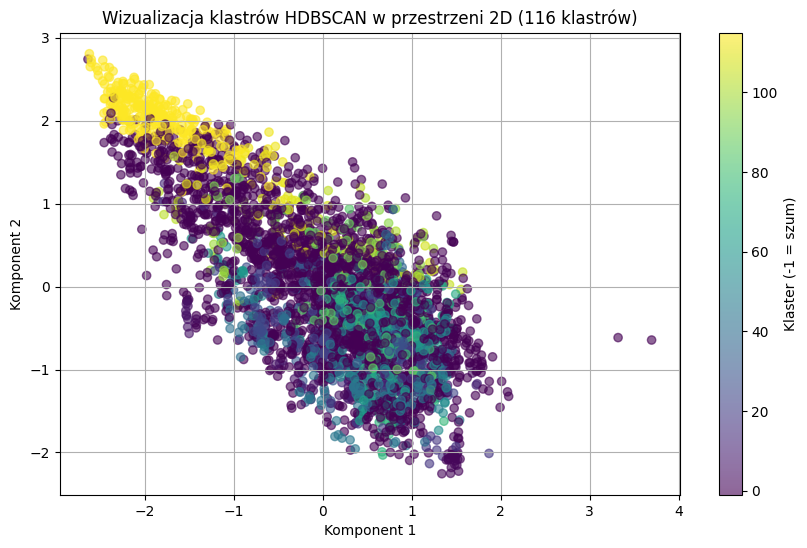

In [ ]:
#HDBSCAN
#PCA10
import pandas as pd
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych (pomiń, jeśli dane są już znormalizowane)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klastrowanie za pomocą HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Odejmujemy szum (-1)
print(f"Liczba klastrów: {n_clusters}")
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Za mało klastrów do obliczenia Silhouette Score.")

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów HDBSCAN w przestrzeni 2D ({n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Spectral Clustering dobrze radzi sobie z klastrami o nieregularnych kształtach i może wykryć subtelne struktury w danych, nawet jeśli punkty są w jednym skupisku.
Wykorzystuje graf podobieństwa, co pozwala modelować złożone relacje między punktami.
Skuteczny dla danych po PCA, gdzie wariancja jest skoncentrowana.

n_clusters: Liczba klastrów (dostrajana za pomocą Silhouette Score).
affinity: nearest_neighbors lub rbf (gaussowskie jądro).
n_neighbors: Liczba sąsiadów w nearest_neighbors (np. 10–50).


Wczytano dane: 3824 wierszy, 101 cech.


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 2 klastrów: 0.0626


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 3 klastrów: 0.0453


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 4 klastrów: 0.0469


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 5 klastrów: 0.0152


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 6 klastrów: 0.0177


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 7 klastrów: 0.0146


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 8 klastrów: 0.0164


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 9 klastrów: 0.0024


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 10 klastrów: 0.0042
Optymalna liczba klastrów: 2


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


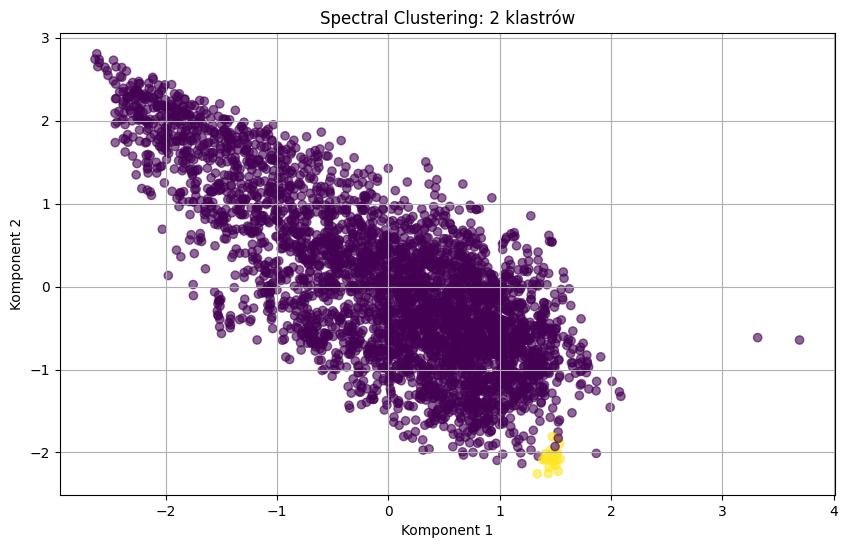

In [21]:
#Spectral Clustering
#PCA100
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
X = load_and_preprocess_csv(file_path)

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
def evaluate_spectral(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors', n_neighbors=20)
        labels = spectral.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}")
    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters, silhouette_scores

optimal_n_clusters, silhouette_scores = evaluate_spectral(X_scaled)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu
spectral = SpectralClustering(n_clusters=optimal_n_clusters, random_state=42, affinity='nearest_neighbors', n_neighbors=20)
labels = spectral.fit_predict(X_scaled)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'Spectral Clustering: {optimal_n_clusters} klastrów')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


GMM zakłada, że dane pochodzą z mieszanki rozkładów normalnych, co pozwala modelować klastry o różnych kształtach i rozmiarach.
Może uchwycić subtelne różnice w gęstości, nawet w jednym skupisku.
Przydatny dla danych ciągłych bez wyraźnych granic.

n_components: Liczba klastrów (można dostroić za pomocą BIC/AIC lub Silhouette Score).
covariance_type: Typ macierzy kowariancji (np. full, tied).

Wczytano dane: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: 0.0098
Silhouette Score dla 3 klastrów: 0.0103
Silhouette Score dla 4 klastrów: -0.0088
Silhouette Score dla 5 klastrów: -0.0115
Silhouette Score dla 6 klastrów: -0.0279
Silhouette Score dla 7 klastrów: -0.0226
Silhouette Score dla 8 klastrów: -0.0136
Silhouette Score dla 9 klastrów: -0.0263
Silhouette Score dla 10 klastrów: -0.0320
Optymalna liczba klastrów: 3


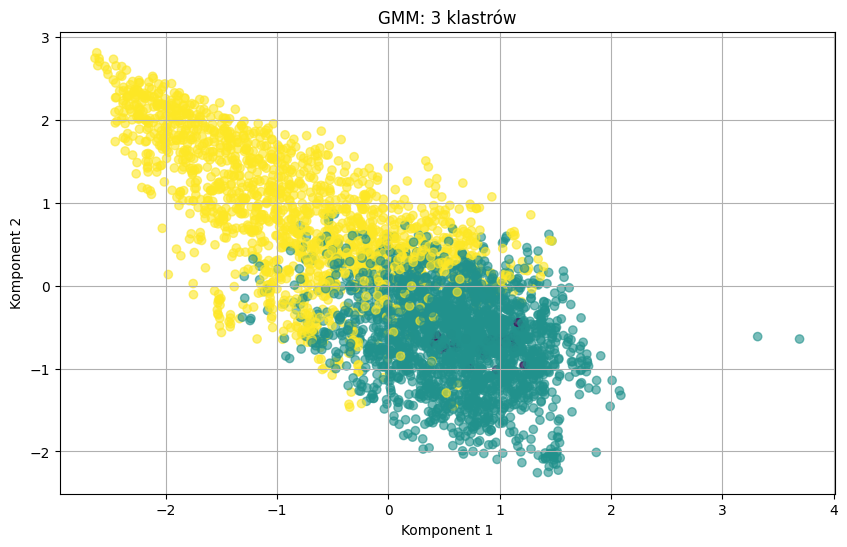

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
X = load_and_preprocess_csv(file_path)

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
def evaluate_gmm(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='full')
        labels = gmm.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}")
    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters, silhouette_scores

optimal_n_clusters, silhouette_scores = evaluate_gmm(X_scaled)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42, covariance_type='full')
labels = gmm.fit_predict(X_scaled)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM: {optimal_n_clusters} klastrów')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.0780
Silhouette Score dla 3 klastrów: 0.0873
Silhouette Score dla 4 klastrów: 0.0760
Silhouette Score dla 5 klastrów: 0.0765
Silhouette Score dla 6 klastrów: 0.1077
Silhouette Score dla 7 klastrów: 0.0940
Silhouette Score dla 8 klastrów: 0.1004
Silhouette Score dla 9 klastrów: 0.0912
Silhouette Score dla 10 klastrów: 0.0877
Optymalna liczba klastrów: 6


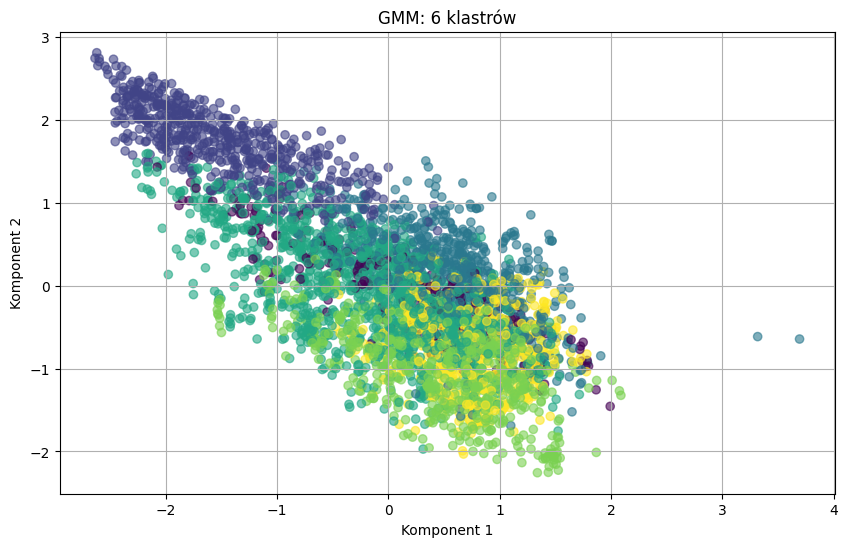

In [ ]:

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
X = load_and_preprocess_csv(file_path)

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_n_clusters, silhouette_scores = evaluate_gmm(X_scaled)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42, covariance_type='full')
labels = gmm.fit_predict(X_scaled)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM: {optimal_n_clusters} klastrów')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

#Ladnie podzielone (6 klastrow a mielismy 6 gatunkow meduz)

Wybrane Modele:
1. Hierarchiczne klastrowanie dla Pca 10 - Silhouette Score dla 6 klastrów: 0.1126
2. GMM Gaussian Mixture Models dla Pca 10 - Silhouette Score dla 6 klastrów: 0.1077

Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\01.jpeg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\02.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\03.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\04.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\05.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\06.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\07.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratoriu

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

Liczba klastrów GMM: 6
Silhouette Score: 0.1181
Adjusted Rand Index (ARI): 0.0519
Normalized Mutual Information (NMI): 0.0901


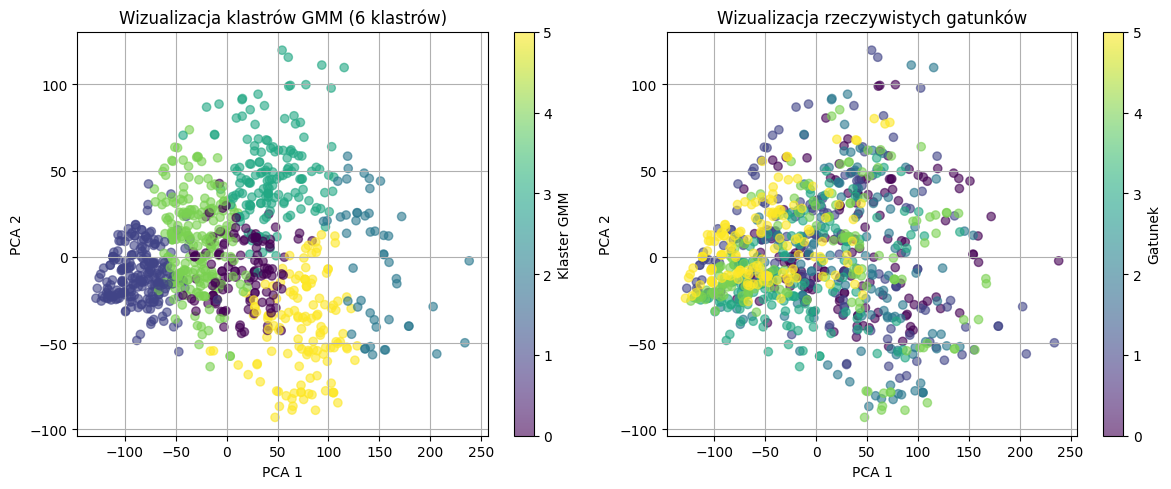

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Funkcja do wczytania i przetworzenia obrazów z folderów gatunków
def load_and_preprocess_images(data_dir, target_size=(64, 64)):
    images = []
    image_paths = []
    labels = []
    valid_extensions = ('.jpg', '.png', '.jpeg')
    
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Folder {data_dir} nie istnieje!")
    
    # Mapowanie nazw folderów na etykiety numeryczne
    species_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
    species_to_label = {species: idx for idx, species in enumerate(species_folders)}
    
    for species in species_folders:
        species_path = os.path.join(data_dir, species)
        for filename in os.listdir(species_path):
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(species_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img_flat = img.flatten()
                    images.append(img_flat)
                    image_paths.append(img_path)
                    labels.append(species_to_label[species])
                    print(f"Wczytano obraz: {img_path}, gatunek: {species}")
                else:
                    print(f"Nie udało się wczytać obrazu: {img_path}")
    
    if not images:
        raise ValueError("Nie wczytano żadnych obrazów!")
    
    return np.array(images), image_paths, np.array(labels), species_to_label

# Wczytanie i przetworzenie danych
data_dir = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\Backup\\train'
try:
    X, image_paths, true_labels, species_to_label = load_and_preprocess_images(data_dir)
    print(f"Wczytano {X.shape[0]} obrazów o wymiarach {X.shape[1]} cech.")
    print(f"Gatunki: {species_to_label}")
except Exception as e:
    print(f"Błąd podczas wczytywania danych: {e}")
    exit()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Dane zostały znormalizowane.")

# Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X_scaled)
print(f"Po redukcji PCA: {X_reduced.shape[0]} obrazów o {X_reduced.shape[1]} cechach.")

# Trenowanie modelu GMM
n_clusters = 6  # Liczba gatunków meduz
gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='full')
gmm_labels = gmm.fit_predict(X_reduced)
print(f"Liczba klastrów GMM: {n_clusters}")

# Obliczenie metryk oceny
if len(set(gmm_labels)) > 1:
    silhouette_avg = silhouette_score(X_reduced, gmm_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    silhouette_avg = None
    print("Za mało klastrów do obliczenia Silhouette Score.")

ari = adjusted_rand_score(true_labels, gmm_labels)
nmi = normalized_mutual_info_score(true_labels, gmm_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# Wizualizacja klastrów w przestrzeni 2D (PCA)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))

# Wykres dla klastrów GMM
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=gmm_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster GMM')
plt.title(f'Wizualizacja klastrów GMM ({n_clusters} klastrów)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)

# Wykres dla rzeczywistych gatunków
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=true_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Gatunek')
plt.title('Wizualizacja rzeczywistych gatunków')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)

plt.tight_layout()
plt.show()

#DO usuniecia ale na backup GMM ladnie zadzialal?


Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\01.jpeg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\02.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\03.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\04.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\05.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\06.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\Backup\train\barrel_jellyfish\07.jpg, gatunek: barrel_jellyfish
Wczytano obraz: C:\Users\oliwi\OneDrive\Pulpit\ML_laboratoriu

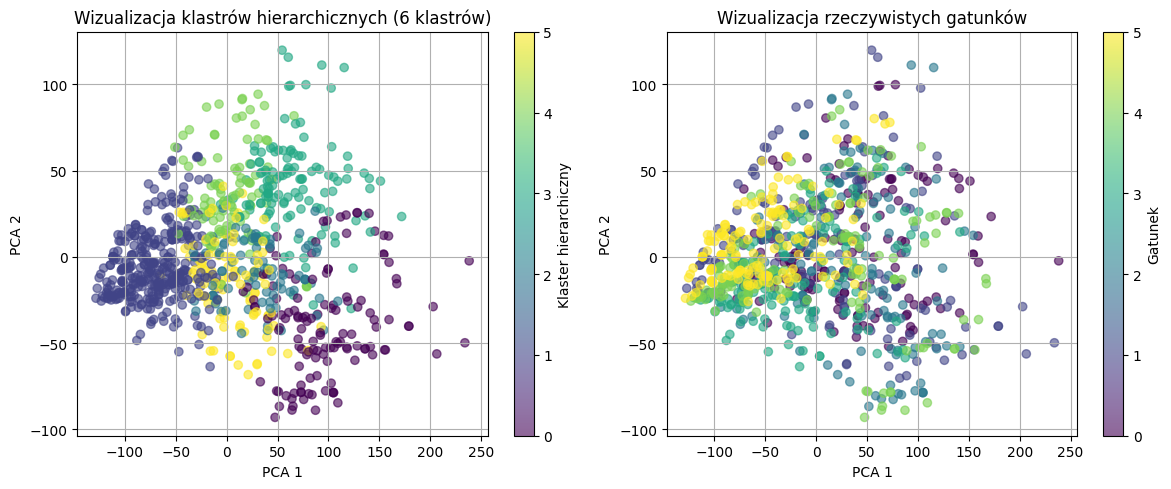

In [4]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Funkcja do wczytania i przetworzenia obrazów z folderów gatunków
def load_and_preprocess_images(data_dir, target_size=(64, 64)):
    images = []
    image_paths = []
    labels = []
    valid_extensions = ('.jpg', '.png', '.jpeg')
    
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Folder {data_dir} nie istnieje!")
    
    # Mapowanie nazw folderów na etykiety numeryczne
    species_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
    species_to_label = {species: idx for idx, species in enumerate(species_folders)}
    
    for species in species_folders:
        species_path = os.path.join(data_dir, species)
        for filename in os.listdir(species_path):
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(species_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img_flat = img.flatten()
                    images.append(img_flat)
                    image_paths.append(img_path)
                    labels.append(species_to_label[species])
                    print(f"Wczytano obraz: {img_path}, gatunek: {species}")
                else:
                    print(f"Nie udało się wczytać obrazu: {img_path}")
    
    if not images:
        raise ValueError("Nie wczytano żadnych obrazów!")
    
    return np.array(images), image_paths, np.array(labels), species_to_label

# Wczytanie i przetworzenie danych
data_dir = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\Backup\\train'
try:
    X, image_paths, true_labels, species_to_label = load_and_preprocess_images(data_dir)
    print(f"Wczytano {X.shape[0]} obrazów o wymiarach {X.shape[1]} cech.")
    print(f"Gatunki: {species_to_label}")
except Exception as e:
    print(f"Błąd podczas wczytywania danych: {e}")
    exit()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Dane zostały znormalizowane.")

# Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X_scaled)
print(f"Po redukcji PCA: {X_reduced.shape[0]} obrazów o {X_reduced.shape[1]} cechach.")

# Trenowanie modelu hierarchicznego
n_clusters = len(species_to_label)  # Ustawienie liczby klastrów na liczbę gatunków
if n_clusters < 2:
    print("Za mało gatunków do klastrowania!")
    exit()

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_reduced)
print(f"Liczba klastrów hierarchicznych: {n_clusters}")

# Obliczenie metryk oceny
if len(set(agg_labels)) > 1:
    silhouette_avg = silhouette_score(X_reduced, agg_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    silhouette_avg = None
    print("Za mało klastrów do obliczenia Silhouette Score.")

ari = adjusted_rand_score(true_labels, agg_labels)
nmi = normalized_mutual_info_score(true_labels, agg_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# Wizualizacja klastrów w przestrzeni 2D (PCA)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))

# Wykres dla klastrów hierarchicznych
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=agg_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster hierarchiczny')
plt.title(f'Wizualizacja klastrów hierarchicznych ({n_clusters} klastrów)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)

# Wykres dla rzeczywistych gatunków
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=true_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Gatunek')
plt.title('Wizualizacja rzeczywistych gatunków')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)

plt.tight_layout()
plt.show()